In [1]:
from src.ft_transformer import CustomerFTTransformer

c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Use Original Data

In [2]:
ft_transformer = CustomerFTTransformer()
ft_transformer.format_dataframe()
ft_transformer.preprocess(use_smote=False)
ft_transformer.set_feautres_processed()
ft_transformer.set_tablar_dataset()
ft_transformer.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 2            1
1      0                 0            2
2      1                 1            0
3      1                 0            3
4      1                 1            2
train_df_train_csv shape after DataFrame creation: (4000, 8)


100%|██████████| 3/3 [00:00<00:00, 500.06it/s]

Final train_df_train_csv_processed shape: (4000, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [3]:
ft_transformer.check_class_distribution(ft_transformer.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3234 samples (80.85%)
  Class 1: 766 samples (19.15%)
Imbalance ratio: 4.22
⚠️  Dataset is imbalanced.


(target
 0    3234
 1     766
 Name: count, dtype: int64,
 4.221932114882507)

In [4]:
ft_transformer.train_model(num_epochs=100, model_name='ft_transformer_model')

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model

=== Training Set Evaluation ===
Training Set Accuracy: 0.8912

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3234
           1       0.81      0.56      0.66       766

    accuracy                           0.89      4000
   macro avg       0.86      0.76      0.80      4000
weighted avg       0.89      0.89      0.88      4000


Training Set Confusion Matrix:
[[3136   98]
 [ 337  429]]
Training Set ROC AUC: 0.9397
✅ 訓練集評估圖表已保存為 'training_metrics.png'


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:722: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


{'model_name': 'ft_transformer_model', 'training_completed': True}

In [5]:
ft_transformer.evaluate_model(model_name='ft_transformer_model')

c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:824: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

Test Accuracy: 0.7640

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       826
           1       0.21      0.13      0.16       174

    accuracy                           0.76      1000
   macro avg       0.52      0.51      0.51      1000
weighted avg       0.72      0.76      0.74      1000


Confusion Matrix:
[[741  85]
 [151  23]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     741      85
Actual 1:     151      23
混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.764,
 array([[741,  85],
        [151,  23]], dtype=int64))

# Over Sampling

## SMOTE

In [28]:
ft_transformer_smote = CustomerFTTransformer()
ft_transformer_smote.format_dataframe()
ft_transformer_smote.preprocess(use_smote=True, smote_method='smote')
ft_transformer_smote.set_feautres_processed()
ft_transformer_smote.set_tablar_dataset()
ft_transformer_smote.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
Encoded num_procedures: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Encoded days_in_hospital: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Encoded comorbidity_score: [0, 1, 2, 3, 4]
=== Feature Encoding Complete ===
Numerical features: ['age']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to', 'num_procedures', 'days_in_hospital', 'comorbidity_score']

Sample of encoded data:
  gender primary_diagnosis discharge_to num_procedures days_in_hospital  \
0      1                 2            1              1                1   
1      0                 0            2              2               12   
2      1                 1            0              1                6   
3      1                 0            3              9                1   
4      1                 1            2              6                3   

  comorbidity_score  
0                 1  
1      

100%|██████████| 6/6 [00:00<00:00, 382.31it/s]

Final train_df_train_csv_processed shape: (6468, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']
categorical features (array): 6
numerical features (cols): ['num_0']
numerical features (array): 1



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [29]:
ft_transformer_smote.check_class_distribution(ft_transformer_smote.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3234 samples (50.00%)
  Class 1: 3234 samples (50.00%)
Imbalance ratio: 1.00
✅ Dataset is relatively balanced.


(target
 0    3234
 1    3234
 Name: count, dtype: int64,
 1.0)

In [32]:
ft_transformer_smote.train_model(num_epochs=500, model_name='ft_transformer_model_smote.pth', use_class_weight=False)

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model_smote.pth


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:384: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

Test Accuracy: 0.4160

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.39      0.52       826
           1       0.16      0.55      0.25       174

    accuracy                           0.42      1000
   macro avg       0.48      0.47      0.39      1000
weighted avg       0.69      0.42      0.47      1000


Confusion Matrix:
[[320 506]
 [ 78  96]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     320     506
Actual 1:      78      96


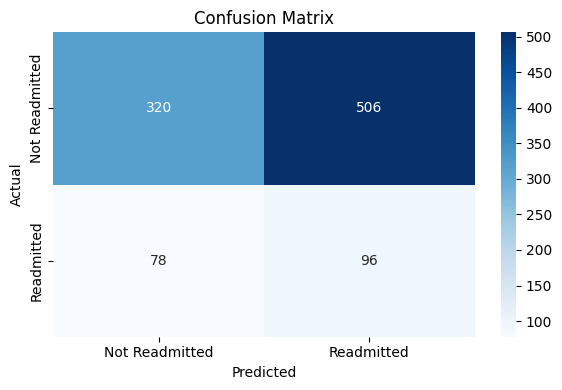

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.416,
 array([[320, 506],
        [ 78,  96]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [39]:
ft_transformer_smote.evaluate_model(model_name='ft_transformer_model_smote.pth')

## SMOTE-NC

In [6]:
ft_transformer_smote_nc = CustomerFTTransformer()
ft_transformer_smote_nc.format_dataframe()
ft_transformer_smote_nc.preprocess(use_smote=True, use_under_sampling=False, smote_method='smotenc')
ft_transformer_smote_nc.set_feautres_processed()
ft_transformer_smote_nc.set_tablar_dataset()
ft_transformer_smote_nc.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 2            1
1      0                 0            2
2      1                 1            0
3      1                 0            3
4      1                 1            2
🔄 Applying SMOTE with method: smotenc
Applying SMOTENC to handle class imbalance...
Original class distribution: {0: 3234, 1: 766}
Using SMOTENC for mixed data types...
Numerical features shape: (4000, 4)
Categorical features shape: (4000, 3)
Categorical feature indices: [4, 5, 6]
Combined features shape: (4000, 7)
After SMOTENC class distribution: {0: 3234, 1: 3234}
Training set size: 4000 -> 6468
After SMOTE - Training set size

100%|██████████| 3/3 [00:00<?, ?it/s]

Final train_df_train_csv_processed shape: (6468, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [7]:
ft_transformer_smote_nc.check_class_distribution(ft_transformer_smote_nc.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3234 samples (50.00%)
  Class 1: 3234 samples (50.00%)
Imbalance ratio: 1.00
✅ Dataset is relatively balanced.


(target
 0    3234
 1    3234
 Name: count, dtype: int64,
 1.0)

In [8]:
ft_transformer_smote_nc.train_model(num_epochs=500, model_name='ft_transformer_model_smote_nc.pth', use_class_weight=False)

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model_smote_nc.pth

=== Training Set Evaluation ===
Training Set Accuracy: 0.9770

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3234
           1       0.97      0.99      0.98      3234

    accuracy                           0.98      6468
   macro avg       0.98      0.98      0.98      6468
weighted avg       0.98      0.98      0.98      6468


Training Set Confusion Matrix:
[[3119  115]
 [  34 3200]]
Training Set ROC AUC: 0.9981
✅ 訓練集評估圖表已保存為 'training_metrics.png'


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:433: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Test Accuracy: 0.6840

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       826
           1       0.17      0.21      0.19       174

    accuracy                           0.68      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.71      0.68      0.70      1000


Confusion Matrix:
[[648 178]
 [138  36]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     648     178
Actual 1:     138      36


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:384: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

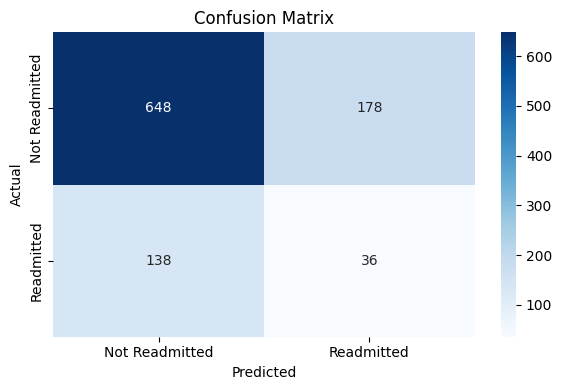

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.684,
 array([[648, 178],
        [138,  36]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [40]:
ft_transformer_smote_nc.evaluate_model(model_name='ft_transformer_model_smote_nc.pth')

## Borderline

In [14]:
ft_transformer_borderline = CustomerFTTransformer()
ft_transformer_borderline.format_dataframe()
ft_transformer_borderline.preprocess(use_smote=True, use_under_sampling=False, smote_method='borderline')
ft_transformer_borderline.set_feautres_processed()
ft_transformer_borderline.set_tablar_dataset()
ft_transformer_borderline.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
Encoded num_procedures: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Encoded days_in_hospital: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Encoded comorbidity_score: [0, 1, 2, 3, 4]
=== Feature Encoding Complete ===
Numerical features: ['age']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to', 'num_procedures', 'days_in_hospital', 'comorbidity_score']

Sample of encoded data:
  gender primary_diagnosis discharge_to num_procedures days_in_hospital  \
0      1                 2            1              1                1   
1      0                 0            2              2               12   
2      1                 1            0              1                6   
3      1                 0            3              9                1   
4      1                 1            2              6                3   

  comorbidity_score  
0                 1  
1      

100%|██████████| 6/6 [00:00<?, ?it/s]

Final train_df_train_csv_processed shape: (6468, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']
categorical features (array): 6
numerical features (cols): ['num_0']
numerical features (array): 1



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [15]:
ft_transformer_borderline.check_class_distribution(ft_transformer_borderline.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3234 samples (50.00%)
  Class 1: 3234 samples (50.00%)
Imbalance ratio: 1.00
✅ Dataset is relatively balanced.


(target
 0    3234
 1    3234
 Name: count, dtype: int64,
 1.0)

In [16]:
ft_transformer_borderline.train_model(num_epochs=500, model_name='ft_transformer_model_borderline.pth', use_class_weight=False)

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model_borderline.pth


Test Accuracy: 0.3870

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.32      0.47       826
           1       0.18      0.68      0.28       174

    accuracy                           0.39      1000
   macro avg       0.50      0.50      0.37      1000
weighted avg       0.72      0.39      0.43      1000


Confusion Matrix:
[[268 558]
 [ 55 119]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     268     558
Actual 1:      55     119


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:394: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

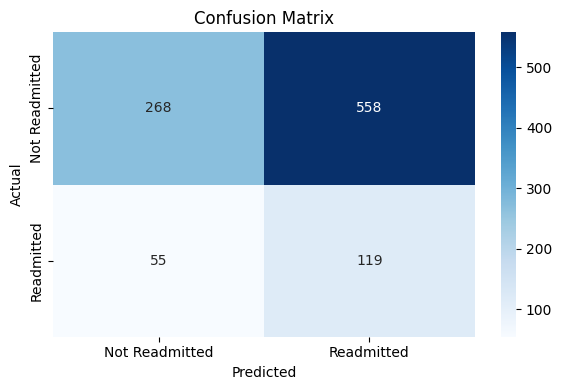

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.387,
 array([[268, 558],
        [ 55, 119]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [17]:
ft_transformer_borderline.evaluate_model(model_name='ft_transformer_model_borderline.pth')

# Under Sampling

## Random Under Sampling

In [2]:
ft_transformer_random_under_sampling = CustomerFTTransformer()
ft_transformer_random_under_sampling.format_dataframe()
ft_transformer_random_under_sampling.preprocess(use_under_sampling=True, under_sampling_method='random')
ft_transformer_random_under_sampling.set_feautres_processed()
ft_transformer_random_under_sampling.set_tablar_dataset()
ft_transformer_random_under_sampling.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 1            1
1      1                 3            0
2      0                 1            2
3      0                 4            0
4      0                 2            3
🔄 Applying under sampling with method: random
=== Applying random under sampling ===
Original class distribution: {0: 3231, 1: 769}
Imbalance ratio: 4.20
Applying random under sampling...
=== Under sampling results ===
Final class distribution: {0: 769, 1: 769}
Training set size: 4000 -> 1538
Samples removed: 2462
✅ Under sampling successful using random method
After under sampling - Training set size: 1538 (was 4000)
train_df_tr

100%|██████████| 3/3 [00:00<00:00, 1000.39it/s]

Final train_df_train_csv_processed shape: (1538, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [3]:
ft_transformer_random_under_sampling.train_df_train_csv_processed

,num_0,num_1,num_2,num_3,cat_0,cat_1,cat_2,target
0,0.033742,-0.498232,-1.588410,-0.743304,1,2,1,0
1,0.945014,0.912966,0.626882,-0.044526,1,3,1,0
2,-0.445876,-0.851031,-1.342267,1.353032,1,0,3,1
3,1.520555,0.207367,1.365312,-0.743304,0,0,2,0
4,-0.637722,-1.203830,-1.096123,-1.442083,1,4,0,1
...,...,...,...,...,...,...,...,...
1533,0.561320,0.560166,0.134595,-1.442083,1,2,0,1
1534,-0.206067,1.618565,-1.096123,1.353032,0,3,0,1
1535,-0.110144,1.265765,-1.342267,-0.743304,1,1,0,1
1536,0.177627,0.912966,-1.588410,-0.743304,1,3,1,1


In [4]:
ft_transformer_random_under_sampling.check_class_distribution(ft_transformer_random_under_sampling.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 769 samples (50.00%)
  Class 1: 769 samples (50.00%)
Imbalance ratio: 1.00
✅ Dataset is relatively balanced.


(target
 0    769
 1    769
 Name: count, dtype: int64,
 1.0)

In [5]:
ft_transformer_random_under_sampling.train_model(num_epochs=100, model_name='ft_transformer_model_random_under_sampling.pth', use_class_weight=False)

Using standard CrossEntropyLoss (no class weights)


Model saved as ./models/ft_transformer_model_random_under_sampling.pth

=== Training Set Evaluation ===
Training Set Accuracy: 0.8875

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       769
           1       0.91      0.86      0.88       769

    accuracy                           0.89      1538
   macro avg       0.89      0.89      0.89      1538
weighted avg       0.89      0.89      0.89      1538


Training Set Confusion Matrix:
[[705  64]
 [109 660]]
Training Set ROC AUC: 0.9584
✅ 訓練集評估圖表已保存為 'training_metrics.png'


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:724: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


{'model_name': 'ft_transformer_model_random_under_sampling.pth',
 'training_completed': True}

In [7]:
ft_transformer_random_under_sampling.evaluate_model(model_name='ft_transformer_model_random_under_sampling.pth')

c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:826: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

Test Accuracy: 0.4740

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.46      0.59       829
           1       0.17      0.54      0.26       171

    accuracy                           0.47      1000
   macro avg       0.50      0.50      0.43      1000
weighted avg       0.72      0.47      0.54      1000


Confusion Matrix:
[[382 447]
 [ 79  92]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     382     447
Actual 1:      79      92
混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.474,
 array([[382, 447],
        [ 79,  92]], dtype=int64))

## Tomek

In [49]:
from src.ft_transformer import CustomerFTTransformer

ft_transformer_tomek_under_sampling = CustomerFTTransformer(num_attn_blocks=4, dropout=0.1)
ft_transformer_tomek_under_sampling.format_dataframe()
ft_transformer_tomek_under_sampling.preprocess(use_under_sampling=True, under_sampling_method='tomek')
ft_transformer_tomek_under_sampling.set_feautres_processed()
ft_transformer_tomek_under_sampling.set_tablar_dataset()
ft_transformer_tomek_under_sampling.set_model_config()
ft_transformer_tomek_under_sampling.train_model(num_epochs=500, model_name='ft_transformer_model_tomek_under_sampling.pth', use_class_weight=True)
ft_transformer_tomek_under_sampling.evaluate_model(model_name='ft_transformer_model_tomek_under_sampling.pth')



Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 1            1
1      1                 3            0
2      0                 1            2
3      0                 4            0
4      0                 2            3
🔄 Applying under sampling with method: tomek
=== Applying tomek under sampling ===
Original class distribution: {0: 3231, 1: 769}
Imbalance ratio: 4.20
Applying tomek under sampling...
Attempting Tomek Links under sampling...
After Tomek Links: 3646 samples
Removed 354 samples
New class distribution: {0: 2877, 1: 769}
=== Under sampling results ===
Final class distribution: {0: 2877, 1: 769}
Training set size: 4000 -> 3646
Sample

100%|██████████| 3/3 [00:00<00:00, 750.05it/s]
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  wa

Final train_df_train_csv_processed shape: (3646, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4
🖥️ GPU 可用: NVIDIA GeForce RTX 3060
🔢 可用GPU數量: 1
💾 GPU記憶體: 12.0 GB
Using current (post-sampling) data distribution for class weight computation
Current class distribution: {0: 2877, 1: 769}
Class 0: weight = 0.6336
Class 1: weight = 2.3706
Original class distribution (for reference): {0: 3231, 1: 769}
Using class weights: [0.63364613 2.3706112 ]


Model saved as ./models/ft_transformer_model_tomek_under_sampling.pth

=== Training Set Evaluation ===
Training Set Accuracy: 0.9756

Training Set Confusion Matrix:
[[2791   86]
 [   3  766]]
Training Set ROC AUC: 0.9994
✅ 訓練集評估圖表已保存為 'ft_transformer_model_tomek_under_sampling.pth_training_metrics.png'
✅ 模型檔案載入成功: ./models/ft_transformer_model_tomek_under_sampling.pth
✅ 模型架構匹配，直接載入成功


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:846: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:947: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded 

Test Accuracy: 0.5490

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68       829
           1       0.15      0.35      0.21       171

    accuracy                           0.55      1000
   macro avg       0.48      0.47      0.45      1000
weighted avg       0.70      0.55      0.60      1000


Confusion Matrix:
[[490 339]
 [112  59]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     490     339
Actual 1:     112      59
混淆矩陣圖表已保存為 'confusion_matrix.png'


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:1065: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


(0.549,
 array([[490, 339],
        [112,  59]], dtype=int64))

In [44]:
ft_transformer_tomek_under_sampling.check_class_distribution(ft_transformer_tomek_under_sampling.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 2877 samples (78.91%)
  Class 1: 769 samples (21.09%)
Imbalance ratio: 3.74
⚠️  Dataset is imbalanced.


(target
 0    2877
 1     769
 Name: count, dtype: int64,
 3.741222366710013)

In [45]:
ft_transformer_tomek_under_sampling.train_model(num_epochs=500, model_name='ft_transformer_model_tomek_under_sampling.pth', use_class_weight=True)

🖥️ GPU 可用: NVIDIA GeForce RTX 3060
🔢 可用GPU數量: 1
💾 GPU記憶體: 12.0 GB
Using current (post-sampling) data distribution for class weight computation
Current class distribution: {0: 2877, 1: 769}
Class 0: weight = 0.6336
Class 1: weight = 2.3706
Original class distribution (for reference): {0: 3231, 1: 769}
Using class weights: [0.63364613 2.3706112 ]


Model saved as ./models/ft_transformer_model_tomek_under_sampling.pth

=== Training Set Evaluation ===
Training Set Accuracy: 0.8280

Training Set Confusion Matrix:
[[2283  594]
 [  33  736]]
Training Set ROC AUC: 0.9492
✅ 訓練集評估圖表已保存為 'ft_transformer_model_tomek_under_sampling.pth_training_metrics.png'


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:846: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
ft_transformer_tomek_under_sampling.evaluate_model(model_name='ft_transformer_model_tomek_under_sampling.pth')

c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:947: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state = torch.load(f"./models/{model_name}")
c:\Users\S

✅ 模型檔案載入成功: ./models/ft_transformer_model_tomek_under_sampling.pth
✅ 模型架構匹配，直接載入成功
Test Accuracy: 0.4710

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.46      0.59       829
           1       0.17      0.54      0.26       171

    accuracy                           0.47      1000
   macro avg       0.50      0.50      0.42      1000
weighted avg       0.72      0.47      0.53      1000


Confusion Matrix:
[[379 450]
 [ 79  92]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     379     450
Actual 1:      79      92
混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.471,
 array([[379, 450],
        [ 79,  92]], dtype=int64))

## ENN

In [3]:
ft_transformer_enn_under_sampling = CustomerFTTransformer()
ft_transformer_enn_under_sampling.format_dataframe()
ft_transformer_enn_under_sampling.preprocess(use_under_sampling=True, under_sampling_method='enn')
ft_transformer_enn_under_sampling.set_feautres_processed()
ft_transformer_enn_under_sampling.set_tablar_dataset()
ft_transformer_enn_under_sampling.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
Encoded num_procedures: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Encoded days_in_hospital: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Encoded comorbidity_score: [0, 1, 2, 3, 4]
=== Feature Encoding Complete ===
Numerical features: ['age']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to', 'num_procedures', 'days_in_hospital', 'comorbidity_score']

Sample of encoded data:
  gender primary_diagnosis discharge_to num_procedures days_in_hospital  \
0      1                 2            1              1                1   
1      0                 0            2              2               12   
2      1                 1            0              1                6   
3      1                 0            3              9                1   
4      1                 1            2              6                3   

  comorbidity_score  
0                 1  
1      

100%|██████████| 6/6 [00:00<?, ?it/s]

Final train_df_train_csv_processed shape: (2471, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']
categorical features (array): 6
numerical features (cols): ['num_0']
numerical features (array): 1



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [4]:
ft_transformer_enn_under_sampling.train_df_train_csv_processed

,num_0,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,target
0,0.585107,0,1,2,8,12,4,0
1,-0.734232,1,0,3,1,4,1,1
2,-1.027418,1,1,2,6,12,0,1
3,-0.050130,1,2,2,3,2,0,0
4,-0.392181,0,1,3,2,0,2,0
...,...,...,...,...,...,...,...,...
2466,0.389650,1,3,0,4,10,4,0
2467,-0.196723,0,2,0,0,6,2,0
2468,-0.392181,0,1,0,3,3,4,0
2469,-1.711519,0,3,3,1,10,2,0


In [5]:
ft_transformer_enn_under_sampling.check_class_distribution(ft_transformer_enn_under_sampling.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 1705 samples (69.00%)
  Class 1: 766 samples (31.00%)
Imbalance ratio: 2.23
⚠️  Dataset is imbalanced.


(target
 0    1705
 1     766
 Name: count, dtype: int64,
 2.2258485639686683)

In [6]:
ft_transformer_enn_under_sampling.train_model(num_epochs=500, model_name='ft_transformer_model_enn_under_sampling.pth', use_class_weight=True)

Using current (post-sampling) data distribution for class weight computation
Current class distribution: {0: 1705, 1: 766}
Class 0: weight = 0.7246
Class 1: weight = 1.6129
Original class distribution (for reference): {0: 3234, 1: 766}
Using class weights: [0.72463346 1.6129243 ]


Model saved as ./models/ft_transformer_model_enn_under_sampling.pth


c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:394: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(f"./models/{model_name}

Test Accuracy: 0.4030

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.36      0.50       826
           1       0.17      0.60      0.26       174

    accuracy                           0.40      1000
   macro avg       0.49      0.48      0.38      1000
weighted avg       0.70      0.40      0.46      1000


Confusion Matrix:
[[298 528]
 [ 69 105]]

Detailed Confusion Matrix:
Predicted:       0       1
Actual 0:     298     528
Actual 1:      69     105


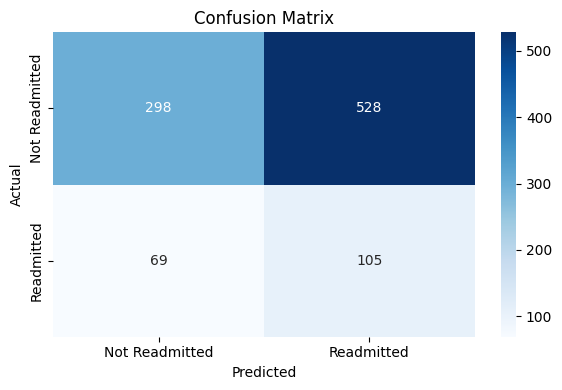

混淆矩陣圖表已保存為 'confusion_matrix.png'


(0.403,
 array([[298, 528],
        [ 69, 105]], dtype=int64))

<Figure size 640x480 with 0 Axes>

In [7]:
ft_transformer_enn_under_sampling.evaluate_model(model_name='ft_transformer_model_enn_under_sampling.pth')

# Class Weight

In [1]:
from src.ft_transformer import CustomerFTTransformer

ft_transformer_class_weight = CustomerFTTransformer()
ft_transformer_class_weight.format_dataframe()
ft_transformer_class_weight.preprocess()
ft_transformer_class_weight.set_feautres_processed()
ft_transformer_class_weight.set_tablar_dataset()
ft_transformer_class_weight.set_model_config()

Encoded gender: [0, 1]
Encoded primary_diagnosis: [0, 1, 2, 3, 4]
Encoded discharge_to: [0, 1, 2, 3]
=== Feature Encoding Complete ===
Numerical features: ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
Categorical features (encoded): ['gender', 'primary_diagnosis', 'discharge_to']

Sample of encoded data:
  gender primary_diagnosis discharge_to
0      1                 1            1
1      1                 3            0
2      0                 1            2
3      0                 4            0
4      0                 2            3
train_df_train_csv shape after DataFrame creation: (4000, 8)


100%|██████████| 3/3 [00:00<?, ?it/s]

Final train_df_train_csv_processed shape: (4000, 7)
Final test_df_train_csv_processed shape: (1000, 7)
=== END PREPROCESS DEBUG ===
categorical features (cols): ['cat_0', 'cat_1', 'cat_2']
categorical features (array): 3
numerical features (cols): ['num_0', 'num_1', 'num_2', 'num_3']
numerical features (array): 4



c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\venv\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\ShiShiuan\Desktop\機器學習與人

In [2]:
ft_transformer_class_weight.check_class_distribution(ft_transformer_class_weight.train_df_train_csv_processed, 'target')

=== Class Distribution Analysis ===
Class distribution:
  Class 0: 3231 samples (80.77%)
  Class 1: 769 samples (19.23%)
Imbalance ratio: 4.20
⚠️  Dataset is imbalanced.


(target
 0    3231
 1     769
 Name: count, dtype: int64,
 4.201560468140442)

In [7]:
ft_transformer_class_weight.train_model(
    num_epochs=100, 
    model_name='ft_transformer_model_class_weight.pth', 
    use_class_weight=True, 
    enable_cv=True, 
    k_folds=3,
    early_stopping=True,
    patience=80
)

🖥️ GPU 可用: NVIDIA GeForce RTX 3060
🔢 可用GPU數量: 1
💾 GPU記憶體: 12.0 GB

🔄 開始 3-Fold Cross Validation 訓練...

📋 Fold 1/3
--------------------------------------------------
Using current (post-sampling) data distribution for class weight computation
Current class distribution: {0: 3231, 1: 769}
Class 0: weight = 0.6190
Class 1: weight = 2.6008
Original class distribution (for reference): {0: 3231, 1: 769}



⏹️ Early stopping triggered at epoch 100
Best validation loss: 0.6931
✅ Fold 1 completed with early stopping after 100 epochs
Final validation - Accuracy: 0.5930, Loss: 0.7336
Fold 1 - Validation Accuracy: 0.5930, Loss: 0.7336

📋 Fold 2/3
--------------------------------------------------
Using current (post-sampling) data distribution for class weight computation
Current class distribution: {0: 3231, 1: 769}
Class 0: weight = 0.6190
Class 1: weight = 2.6008
Original class distribution (for reference): {0: 3231, 1: 769}



⏹️ Early stopping triggered at epoch 86
Best validation loss: 0.6973
✅ Fold 2 completed with early stopping after 86 epochs
Final validation - Accuracy: 0.6324, Loss: 0.7305
Fold 2 - Validation Accuracy: 0.6324, Loss: 0.7305

📋 Fold 3/3
--------------------------------------------------
Using current (post-sampling) data distribution for class weight computation
Current class distribution: {0: 3231, 1: 769}
Class 0: weight = 0.6190
Class 1: weight = 2.6008
Original class distribution (for reference): {0: 3231, 1: 769}


✅ Fold 3 completed full training (100 epochs)
Final validation - Accuracy: 0.4126, Loss: 0.7029
Fold 3 - Validation Accuracy: 0.4126, Loss: 0.7029
💾 最佳模型已保存: ./models/ft_transformer_model_class_weight.pth_best_cv.pth (來自 Fold 2)

🎯 Cross Validation 總結
平均準確率: 0.5460 ± 0.0957
平均損失: 0.7223 ± 0.0138
最佳模型來自: Fold 2 (準確率: 0.6324)

📊 Plotting confusion matrices for each fold...
Confusion matrix for fold 1 saved as: ./images/ft_transformer_model_class_weight.pth_fold1_cm.png
Confusion matrix for fold 2 saved as: ./images/ft_transformer_model_class_weight.pth_fold2_cm.png
Confusion matrix for fold 3 saved as: ./images/ft_transformer_model_class_weight.pth_fold3_cm.png


In [5]:
ft_transformer_class_weight.evaluate_model(model_name='ft_transformer_model_class_weight_cv.pth', num_attn_blocks=1)

c:\Users\ShiShiuan\Desktop\機器學習與人工智慧實作\src\ft_transformer.py:958: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_for_eval.load_state_dict(torch.load(f"./models/{model_n

FileNotFoundError: [Errno 2] No such file or directory: './models/ft_transformer_model_class_weight_cv.pth'